In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'ingressi_terapia_intensiva',
       'note_test', 'note_casi', 'variazione_terapia_intensiva',
       'variazione_ricoverati_con_sintomi', 'variazione_totale_ospedalizzati',
       'variazione_isolamento_domiciliare', 'nuovi_dimessi_guariti',
       'nuovi_deceduti', 'nuovi_tamponi', 'nuovi_casi_testati', 'ti_su_to',
       'to_su_tp', 'np_su_nt', 'np_su_nct', 'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [5]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 14245
Nuovi tamponi: 102974.0
Percentuale nuovi positivi/nuovi tamponi: 14.000000000000002 %
Nuovi guariti: 14746.0
Nuovi deceduti: 347.0
Variazione positivi ricoverati con sintomi: 127.0
Variazione positivi in terapia intensiva: 14.0
Variazione positivi in isolamento dimiciliare: -989.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 3, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-04T17:00:00,22116,2292,24408,418827,443235,25093,30550,307378,39747,...,5103.0,335.0,211831.0,127500.0,9.39,5.51,14.42,23.96,3.01,6.00
1,2020-11-05T17:00:00,23256,2391,25647,446701,472348,29113,34505,312339,40192,...,4961.0,445.0,219884.0,134550.0,9.32,5.43,15.69,25.64,4.32,6.57
2,2020-11-06T17:00:00,24005,2515,26520,472598,499118,26770,37809,322925,40638,...,10586.0,446.0,234245.0,134566.0,9.48,5.31,16.14,28.10,5.19,5.67
3,2020-11-07T17:00:00,25109,2634,27743,504793,532536,33418,39811,328891,41063,...,5966.0,425.0,231673.0,137646.0,9.49,5.21,17.18,28.92,4.73,6.70
4,2020-11-08T17:00:00,26440,2749,29189,529447,558636,26100,32616,335074,41394,...,6183.0,331.0,191144.0,119249.0,9.42,5.23,17.06,27.35,4.37,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-30T17:00:00,23566,2528,26094,538301,564395,-4333,16202,1445690,73604,...,19960.0,575.0,169045.0,63748.0,9.69,4.62,9.58,25.42,-0.82,-0.76
57,2020-12-31T17:00:00,23151,2555,25706,544190,569896,5501,23477,1463111,74159,...,17421.0,555.0,186004.0,76798.0,9.94,4.51,12.62,30.57,1.07,0.97
58,2021-01-01T17:00:00,22822,2553,25375,549392,574767,4871,22211,1479988,74621,...,16877.0,462.0,157524.0,70010.0,10.06,4.41,14.10,31.73,-0.08,0.85
59,2021-01-02T17:00:00,22948,2569,25517,551545,577062,2295,11831,1489154,74985,...,9166.0,364.0,67174.0,30451.0,10.07,4.42,17.61,38.85,0.63,0.40


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

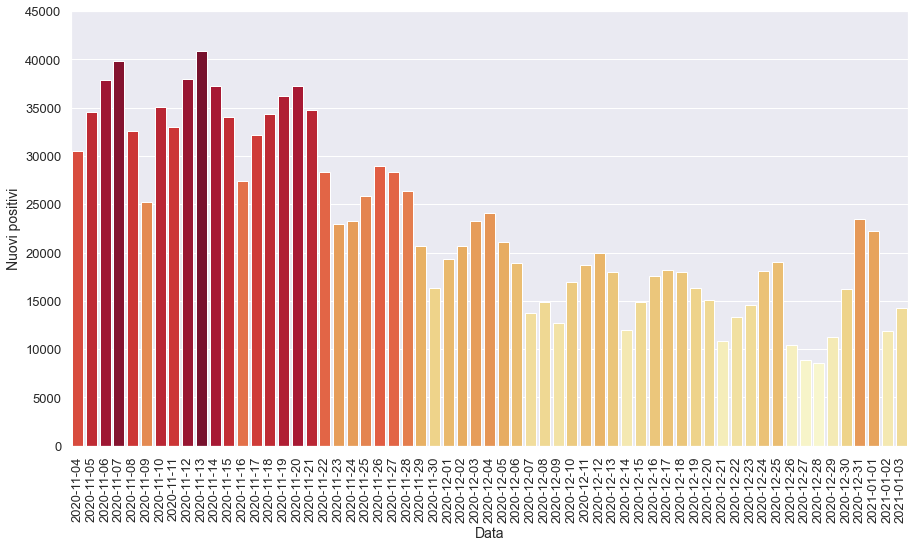

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

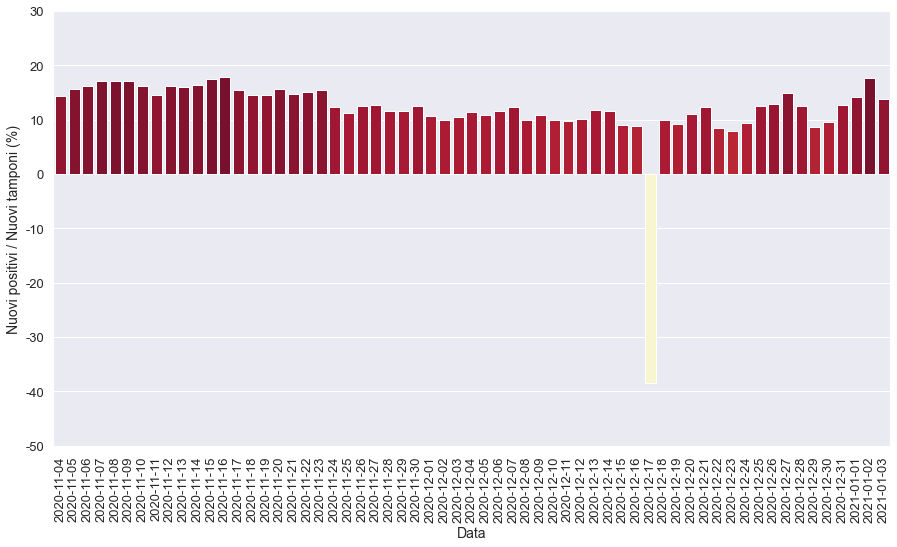

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

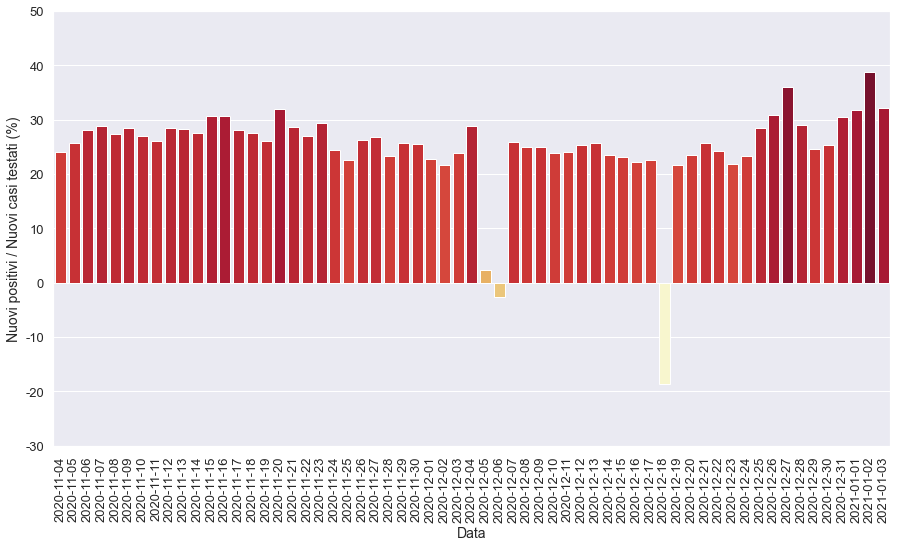

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

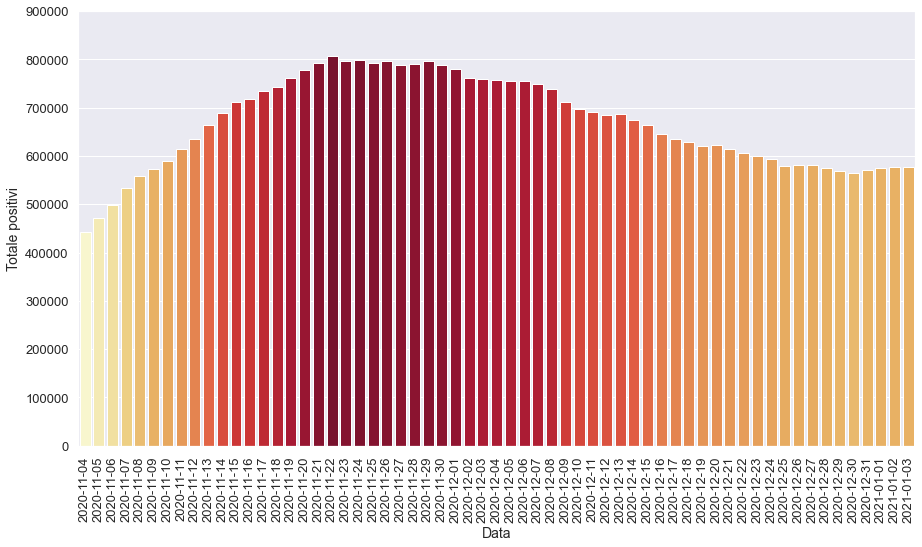

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

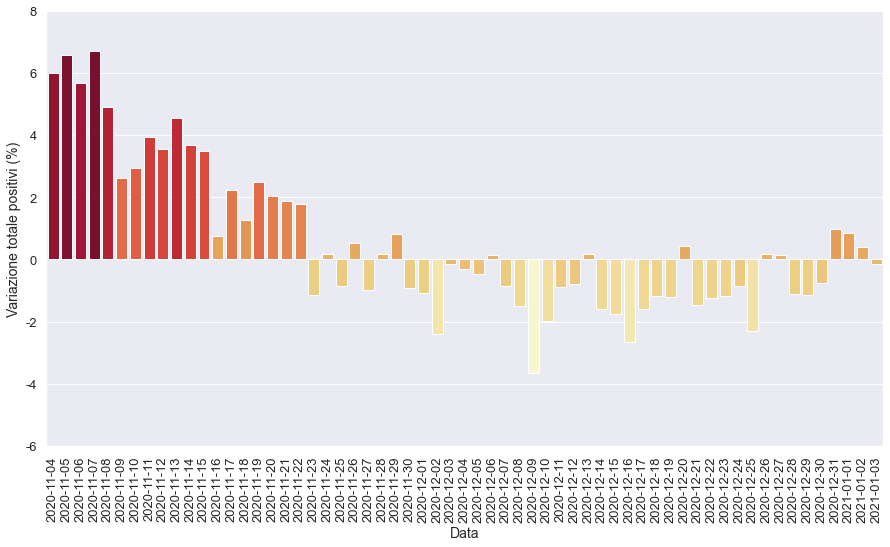

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

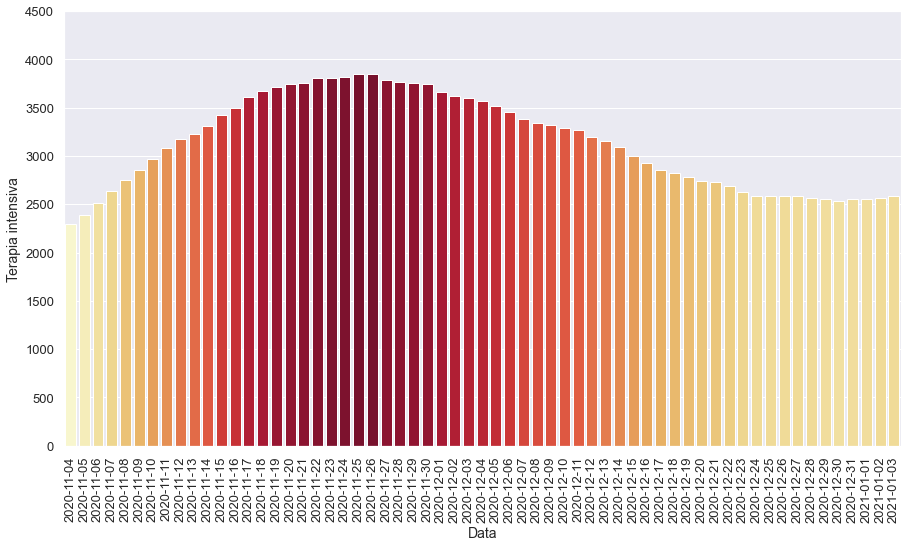

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

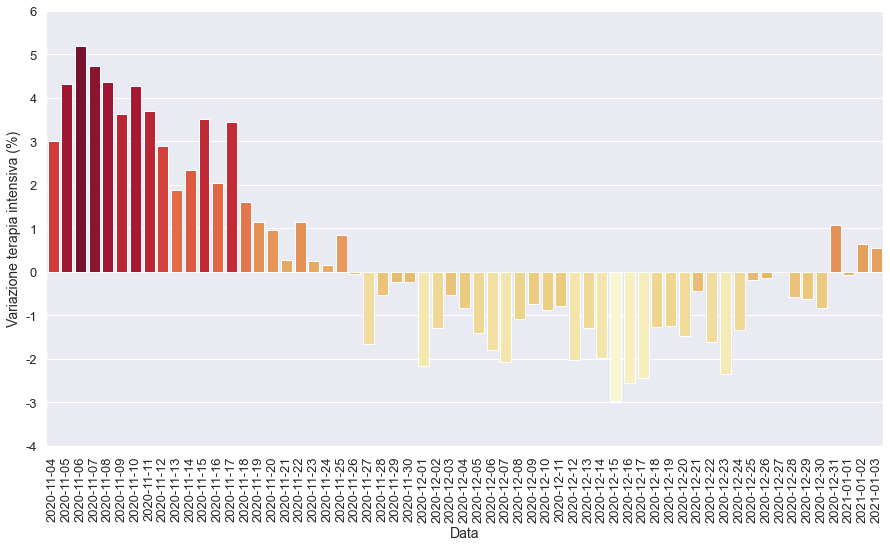

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

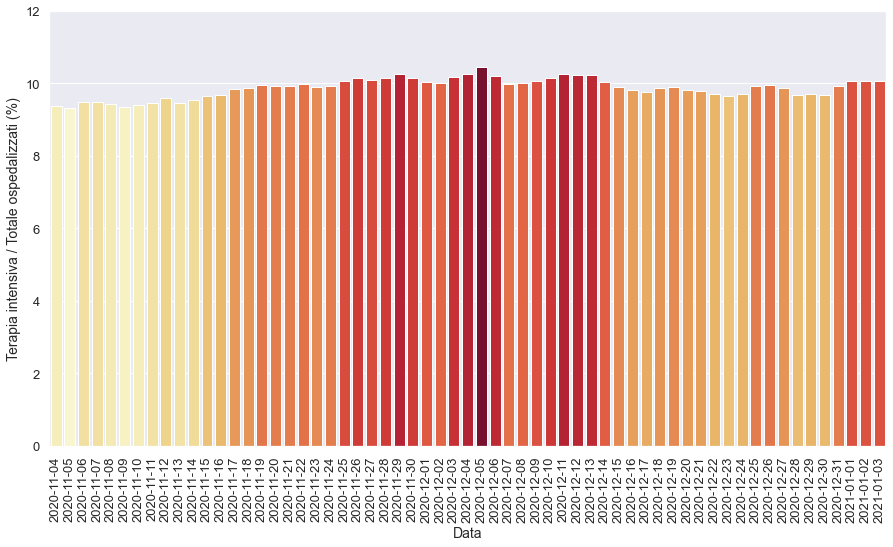

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

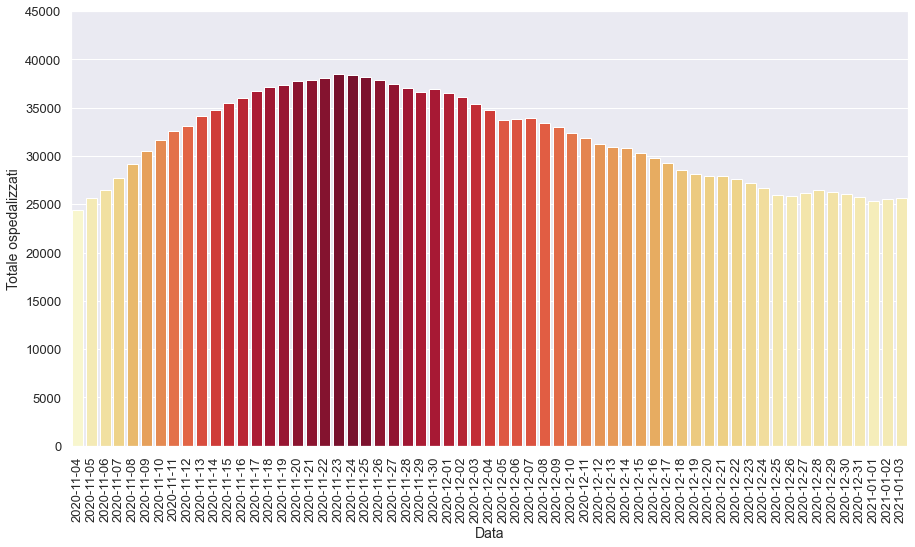

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

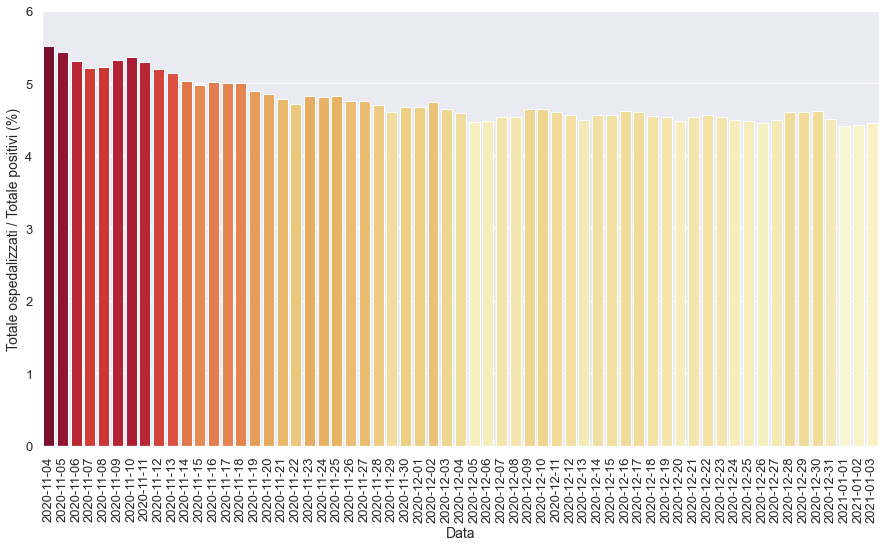

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

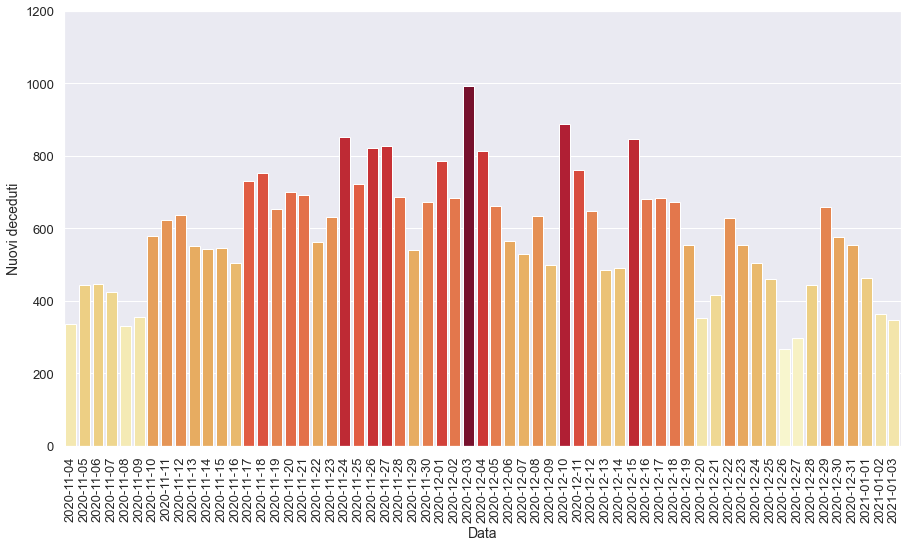

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

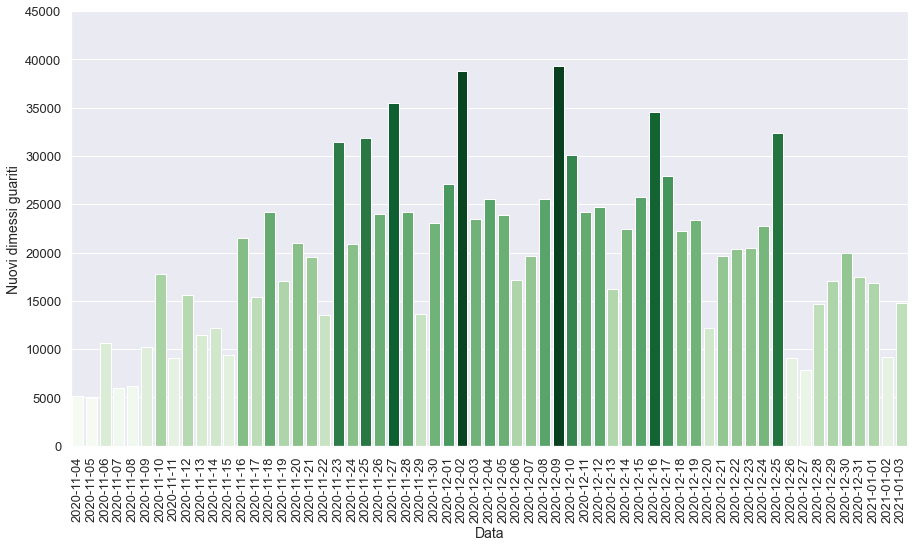

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-04T17:00:00,31200,3567,34767,722935,757702,-2280,24099,872385,58852,...,25576.0,814.0,212741.0,83491.0,10.26,4.59,11.33,28.86,-0.83,-0.30
1,2020-12-05T17:00:00,30158,3517,33675,720494,754169,-3533,21052,896308,59514,...,23923.0,662.0,194984.0,894721.0,10.44,4.47,10.80,2.35,-1.40,-0.47
2,2020-12-06T17:00:00,30391,3454,33845,721461,755306,1137,18887,913494,60078,...,17186.0,564.0,163550.0,-732995.0,10.21,4.48,11.55,-2.58,-1.79,0.15
3,2020-12-07T17:00:00,30524,3382,33906,714913,748819,-6487,13720,933132,60606,...,19638.0,528.0,111217.0,53109.0,9.97,4.53,12.34,25.83,-2.08,-0.86
4,2020-12-08T17:00:00,30081,3345,33426,704099,737525,-11294,14842,958629,61240,...,25497.0,634.0,149232.0,59551.0,10.01,4.53,9.95,24.92,-1.09,-1.51
5,2020-12-09T17:00:00,29653,3320,32973,677542,710515,-27010,12756,997895,61739,...,39266.0,499.0,118475.0,50932.0,10.07,4.64,10.77,25.05,-0.75,-3.66
6,2020-12-10T17:00:00,29088,3291,32379,664148,696527,-13988,16999,1027994,62626,...,30099.0,887.0,171586.0,71113.0,10.16,4.65,9.91,23.90,-0.87,-1.97
7,2020-12-11T17:00:00,28562,3265,31827,658496,690323,-6204,18727,1052163,63387,...,24169.0,761.0,190416.0,78154.0,10.26,4.61,9.83,23.96,-0.79,-0.89
8,2020-12-12T17:00:00,28066,3199,31265,653583,684848,-5475,19903,1076891,64036,...,24728.0,649.0,196439.0,78563.0,10.23,4.57,10.13,25.33,-2.02,-0.79
9,2020-12-13T17:00:00,27735,3158,30893,655138,686031,1183,17938,1093161,64520,...,16270.0,484.0,152697.0,70024.0,10.22,4.50,11.75,25.62,-1.28,0.17


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

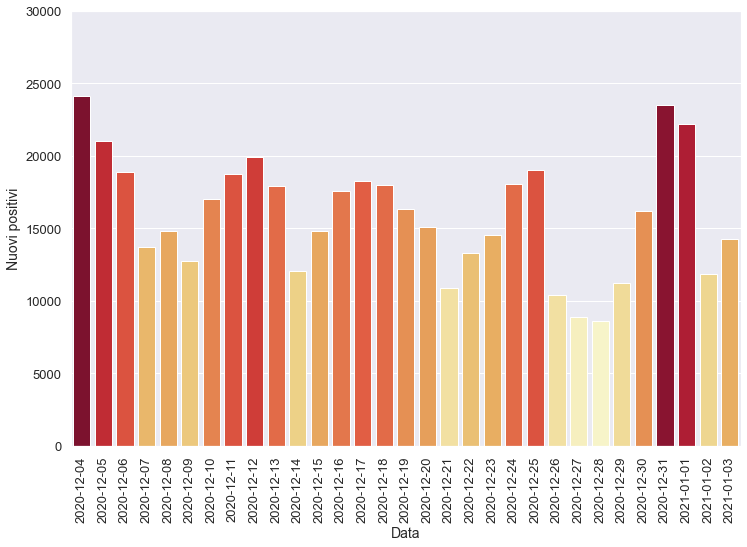

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

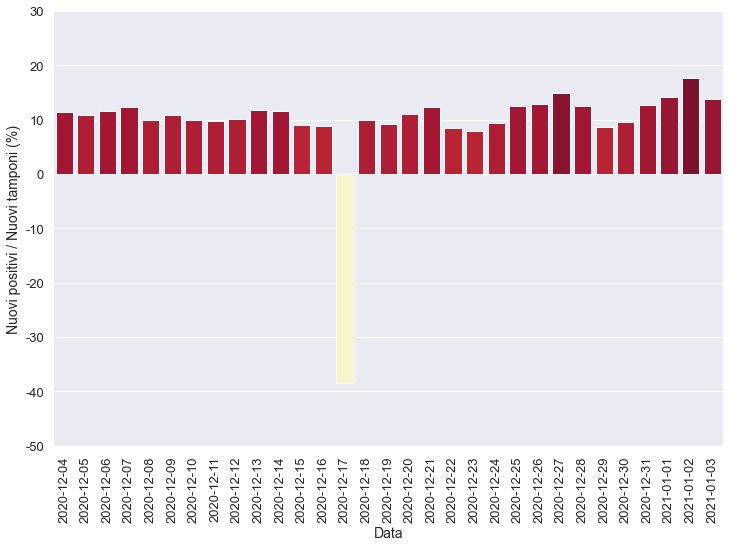

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

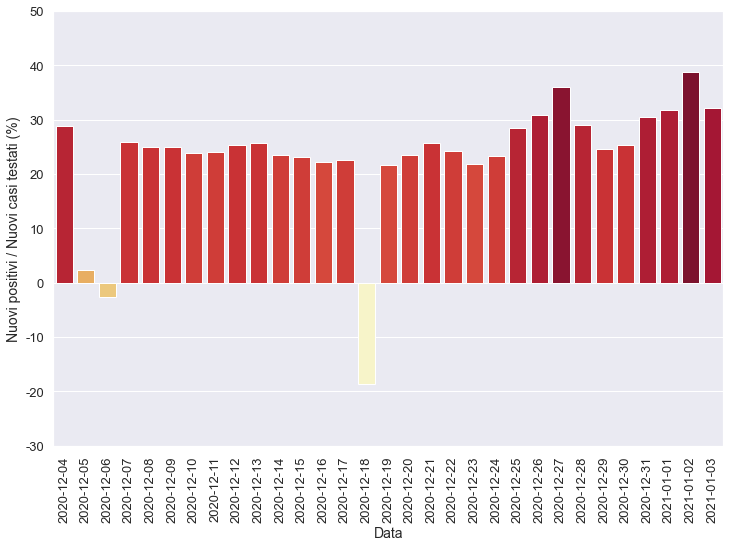

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

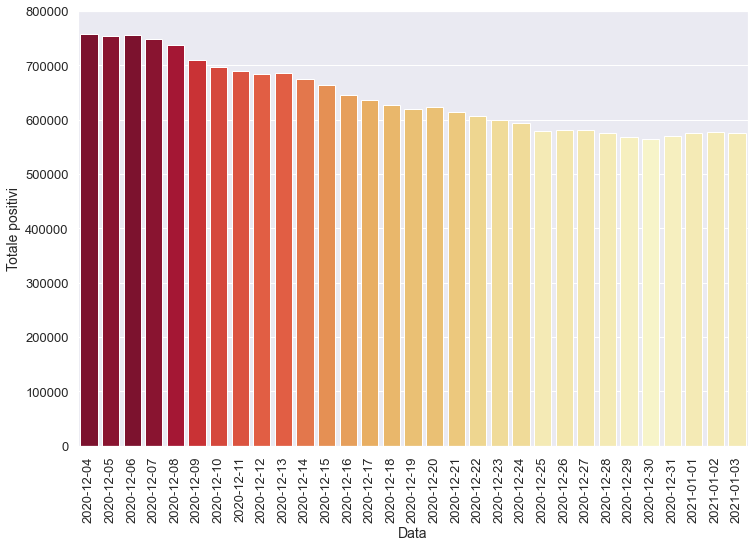

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

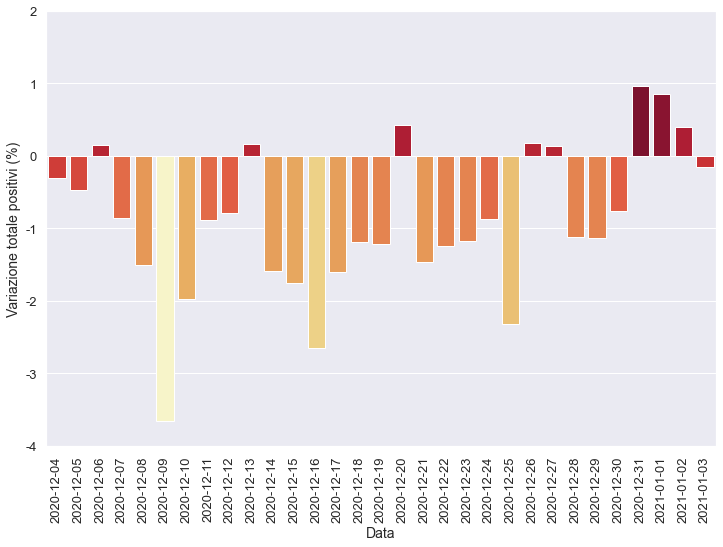

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

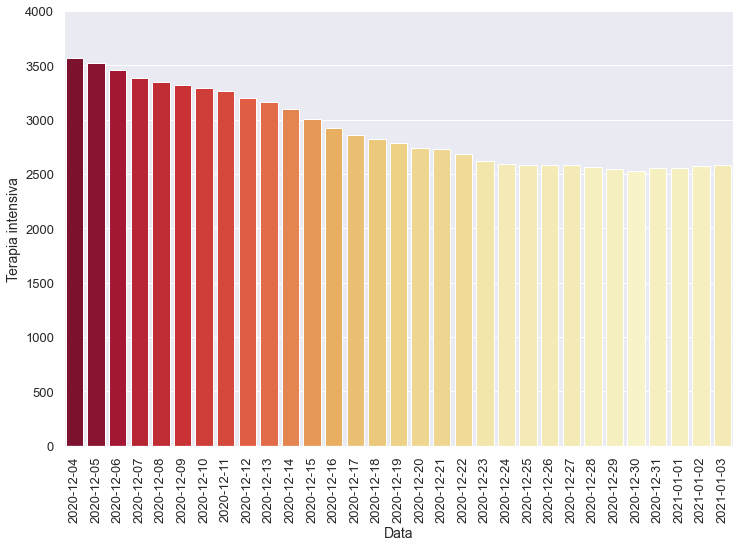

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

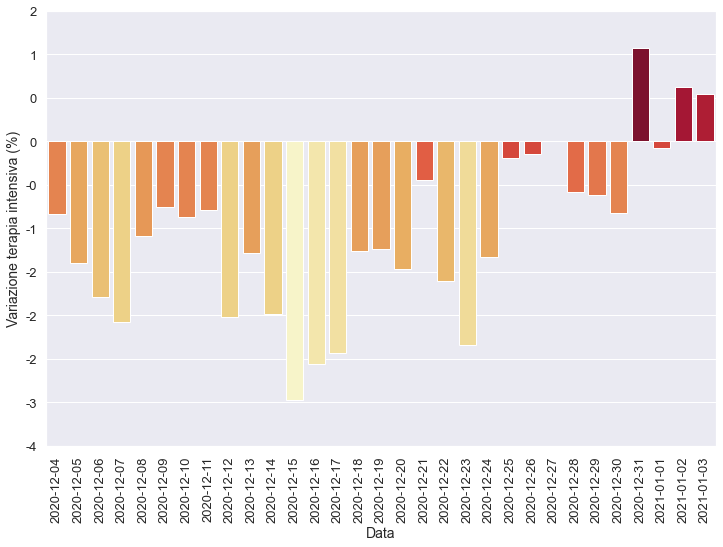

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

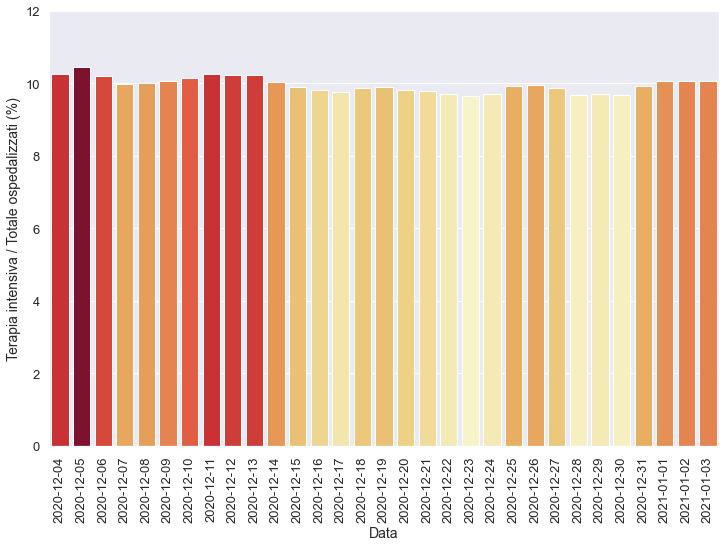

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

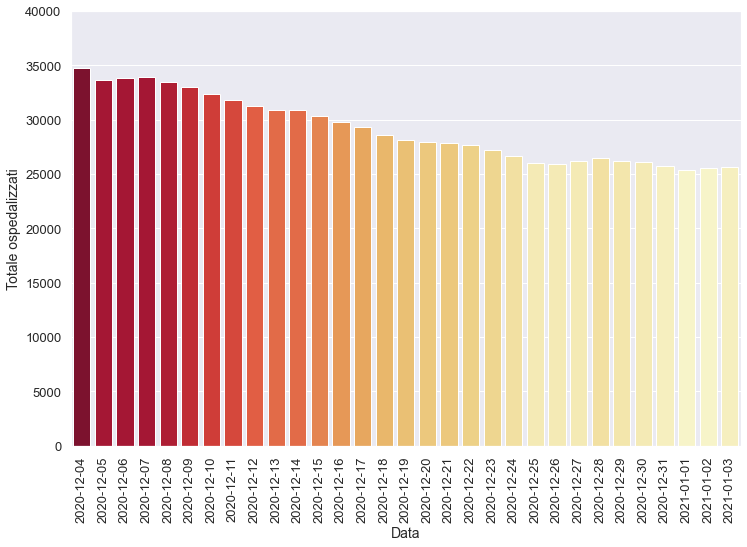

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

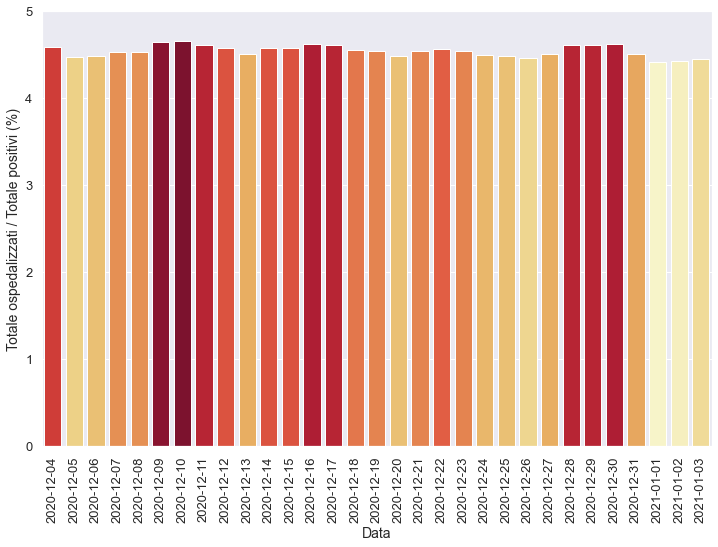

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

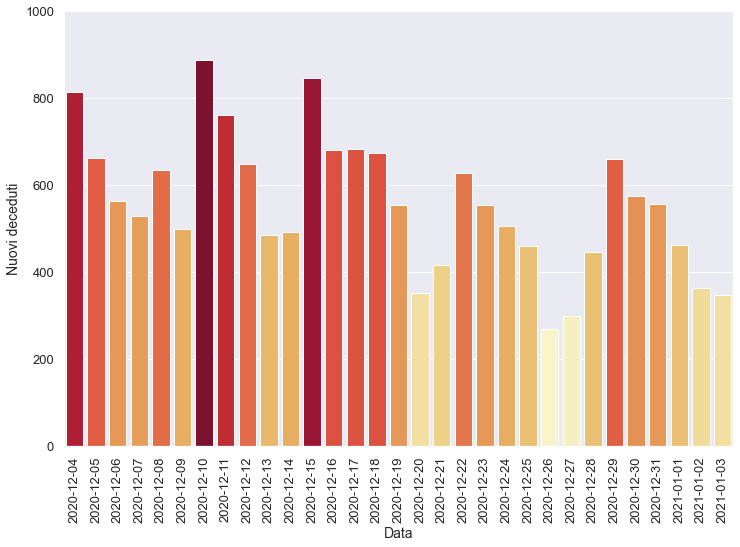

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

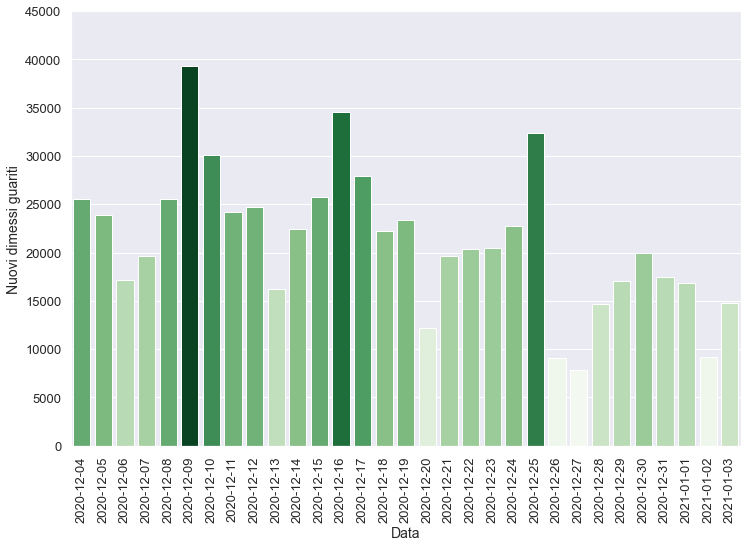

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-27T17:00:00,23571,2580,26151,555609,581760,817,8913,1394011,71925,...,7798.0,298.0,59879.0,24757.0,9.87,4.50,14.89,36.00,0.00,0.14
1,2020-12-28T17:00:00,23932,2565,26497,548724,575221,-6539,8585,1408686,72370,...,14675.0,445.0,68681.0,29665.0,9.68,4.61,12.50,28.94,-0.58,-1.12
2,2020-12-29T17:00:00,23662,2549,26211,542517,568728,-6493,11224,1425730,73029,...,17044.0,659.0,128740.0,45702.0,9.72,4.61,8.72,24.56,-0.62,-1.13
3,2020-12-30T17:00:00,23566,2528,26094,538301,564395,-4333,16202,1445690,73604,...,19960.0,575.0,169045.0,63748.0,9.69,4.62,9.58,25.42,-0.82,-0.76
4,2020-12-31T17:00:00,23151,2555,25706,544190,569896,5501,23477,1463111,74159,...,17421.0,555.0,186004.0,76798.0,9.94,4.51,12.62,30.57,1.07,0.97
5,2021-01-01T17:00:00,22822,2553,25375,549392,574767,4871,22211,1479988,74621,...,16877.0,462.0,157524.0,70010.0,10.06,4.41,14.10,31.73,-0.08,0.85
6,2021-01-02T17:00:00,22948,2569,25517,551545,577062,2295,11831,1489154,74985,...,9166.0,364.0,67174.0,30451.0,10.07,4.42,17.61,38.85,0.63,0.40
7,2021-01-03T17:00:00,23075,2583,25658,550556,576214,-848,14245,1503900,75332,...,14746.0,347.0,102974.0,44310.0,10.07,4.45,13.83,32.15,0.54,-0.15


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

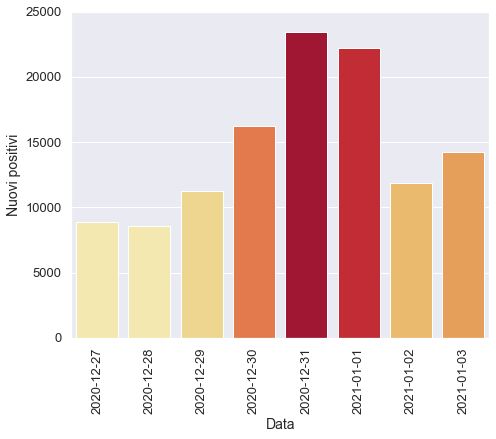

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

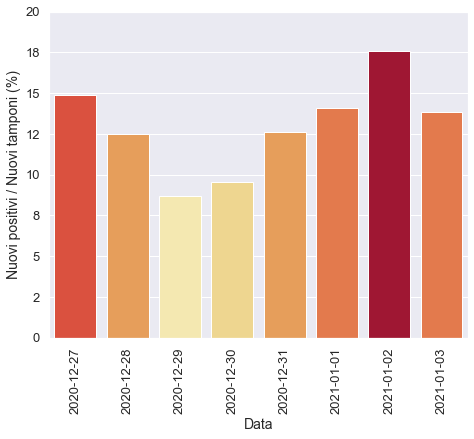

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

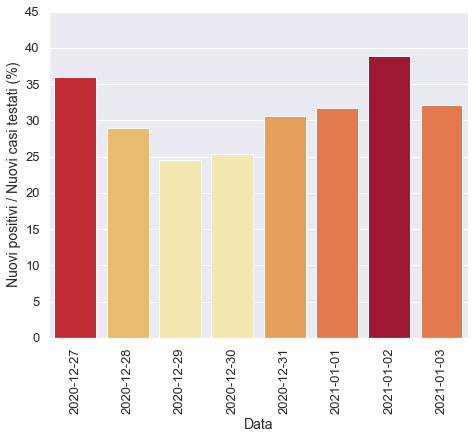

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

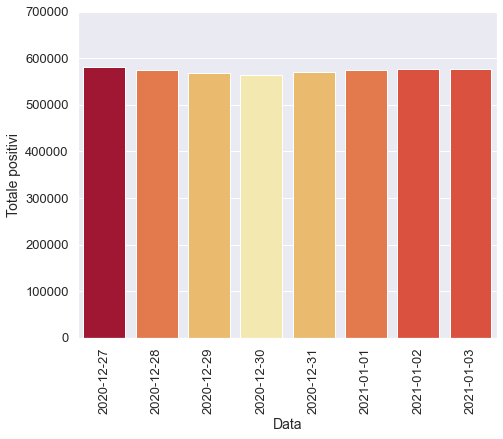

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

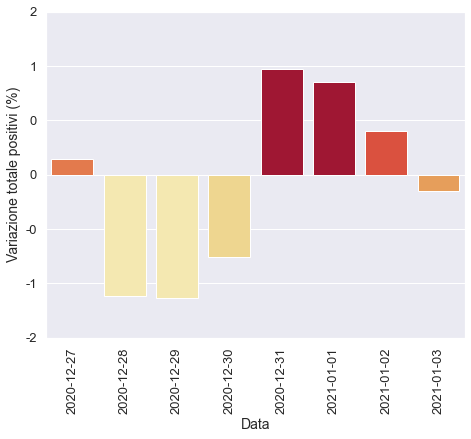

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

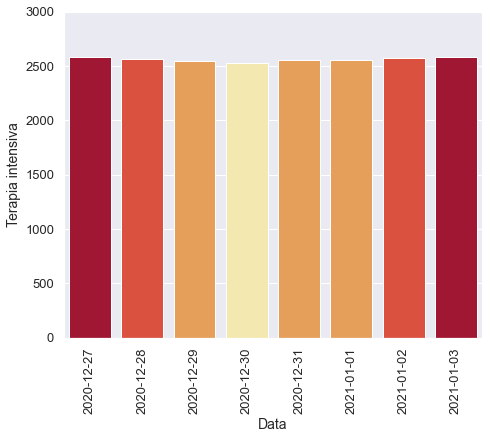

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

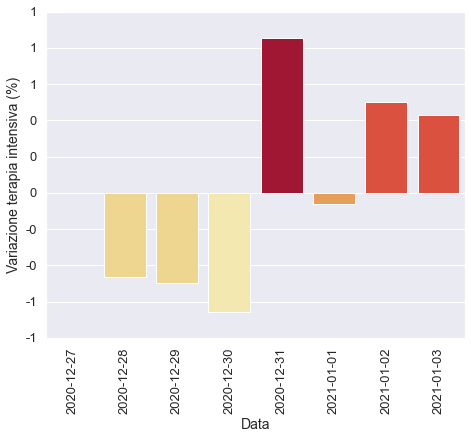

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

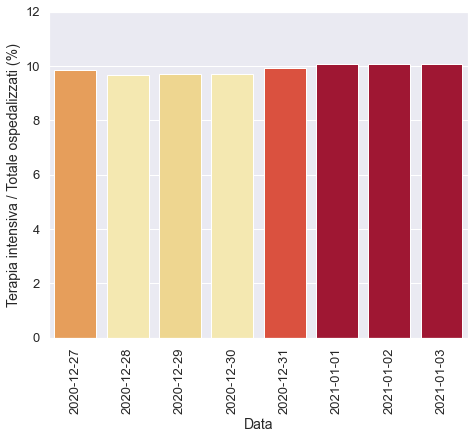

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

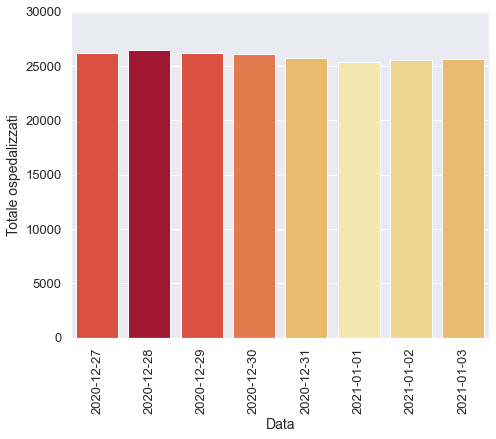

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

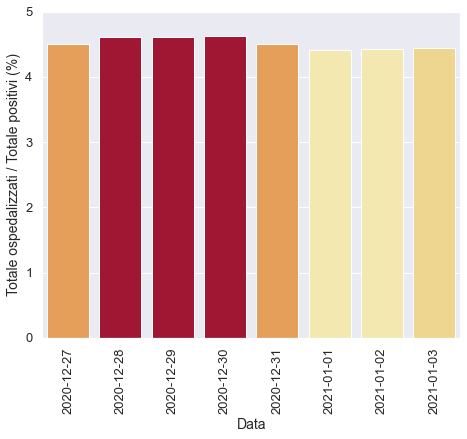

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

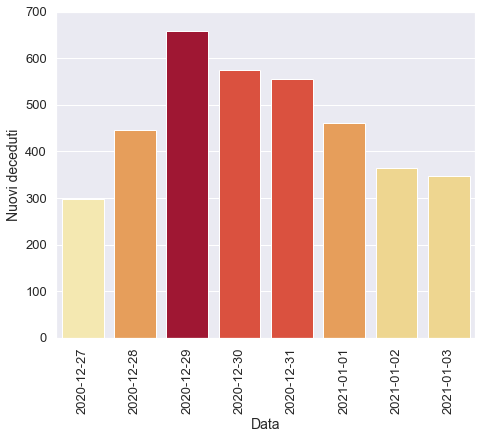

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

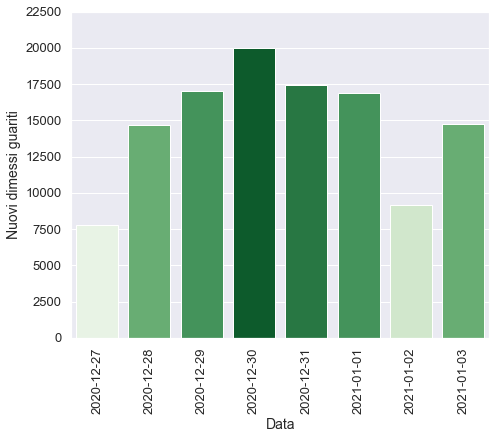

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)